In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Functions as AC

### NOTE: To view any functions that are defined outside the decision tree and random forest classes, go to Functions.py

# Data Preprocessing (6.3)


### Loading the Data

In [2]:
training_set = AC.data_loader("training_set.csv")

$\textbf{Training Set Data Description:}$

$\quad$ ra) Right Ascension

$\quad$ dec) Declination

$\quad$ plx) Parallax

$\quad$ pmra) Right Ascension component of proper motion

$\quad$ pmdec) Declination component of proper motion

$\quad$ g_mag) G apparent magnitude

$\quad$ bp_mag) Blue Photometric apparent magnitude

$\quad$ rp_mag) Red Photometric apparent magnitude

$\quad$ label) Galactic component [0: thin disk, 1: thick disk, 2: Galactic Halo]

$\quad$ g_rp) G - RP color index

$\quad$ bp_g) BP - G color index

$\quad$ bp_rp) BP - RP color index

In [3]:
display(training_set)

,Unnamed: 0,ra,dec,plx,pmra,pmdec,g_mag,bp_mag,rp_mag,label,g_rp,bp_g,bp_rp
0,49345,4.202,-0.017,14.202,162.7,-227.0,19.588,20.082,18.944,1,0.644,0.494,1.138
1,58049,2.816,0.401,18.391,-58.7,-164.6,18.755,19.200,18.068,1,0.687,0.445,1.132
2,54663,2.871,-0.134,12.690,28.4,-164.9,19.595,20.198,18.791,1,0.804,0.603,1.407
3,28301,4.453,-1.170,13.315,-89.6,-47.9,18.846,19.253,18.319,0,0.527,0.407,0.934
4,47571,5.678,-0.315,38.577,-126.8,-712.3,14.751,14.869,14.520,1,0.231,0.118,0.349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36783,3.773,0.323,14.219,-110.0,61.9,19.617,19.989,18.980,1,0.637,0.372,1.009
29996,53135,3.492,-0.358,13.786,-55.0,-159.5,19.555,20.014,18.801,1,0.754,0.459,1.213
29997,54626,2.605,0.008,15.440,-219.9,-352.8,19.398,19.990,18.737,1,0.661,0.592,1.253
29998,90325,1.854,0.031,11.257,247.7,-329.2,19.267,19.800,18.645,2,0.622,0.533,1.155


### Splitting up the data via galactic component

In [4]:
# Select only data from the training set that is in the thin disk (label=0)
thin_disk = training_set[training_set["label"] == 0]

# Select only data from the training set that is in the thick disk (label=1)
thick_disk = training_set[training_set["label"] == 1]

# Select only data from the training set that is in the halo (label=2)
halo = training_set[training_set["label"] == 2]

print('the amount of white dwarfs in the training set are ' + str(len(training_set)))
print('the amount of white dwarfs in the thin disk are ' + str(len(thin_disk)))
print('the amount of white dwarfs in the thick disk are ' + str(len(thick_disk)))
print('the amount of white dwarfs in the halo are ' + str(len(halo)))

the amount of white dwarfs in the training set are 30000
the amount of white dwarfs in the thin disk are 9933
the amount of white dwarfs in the thick disk are 10112
the amount of white dwarfs in the halo are 9955


### Visualizing Features of the White Dwarfs in the thin disk, thick disk, and galactic halo

$\quad$ Red dashed line) Mean

$\quad$ Green dashed line) Median

#### G Magnitude

Text(0.5, 1.0, 'G Magnitude Distributions in the Halo')

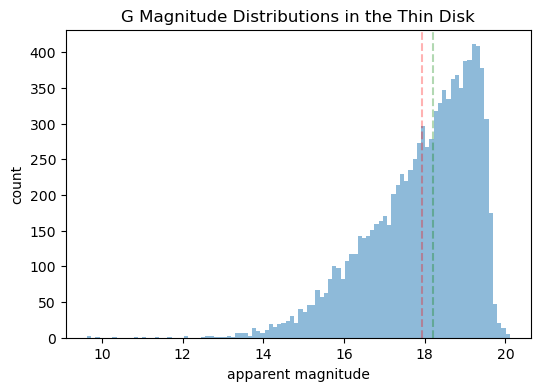

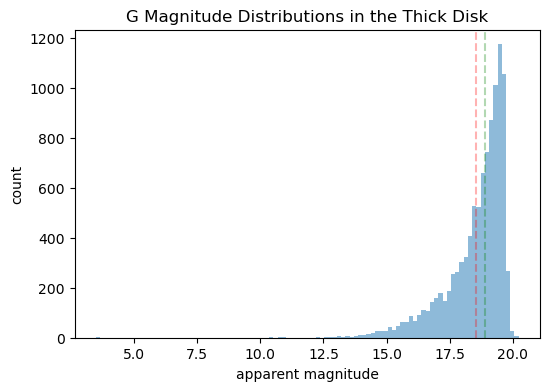

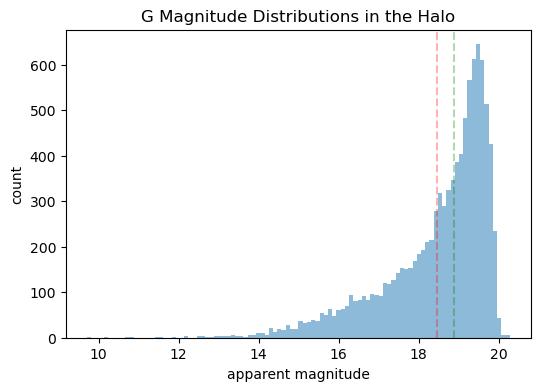

In [5]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Halo')

#### BP - RP Color Index

Text(0.5, 1.0, 'BP - RP color index in the Halo')

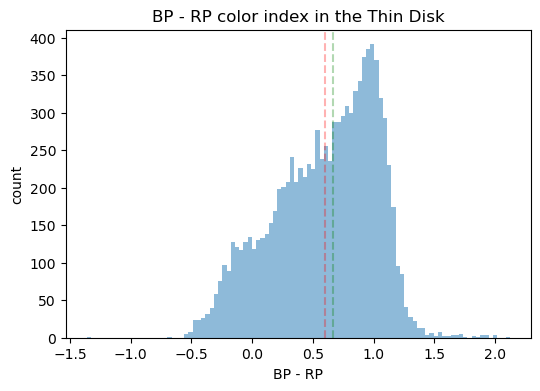

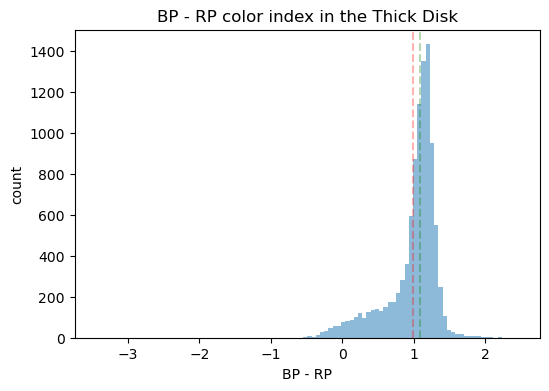

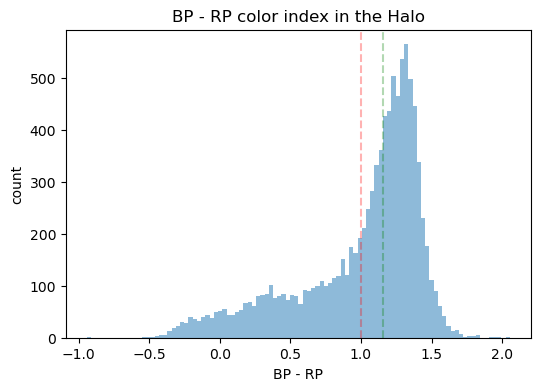

In [6]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Halo')

#### Parallax

Text(0.5, 1.0, 'Parallax in the Halo')

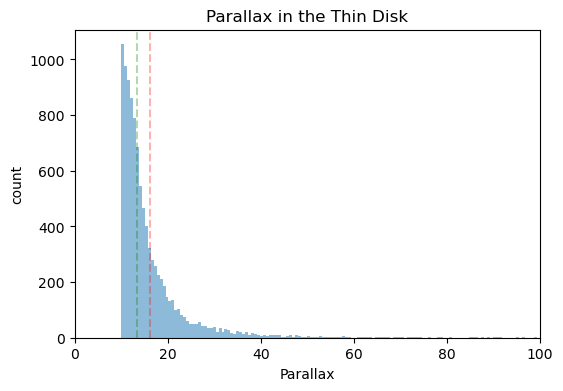

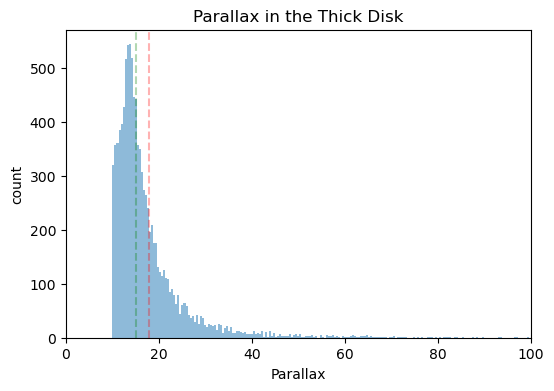

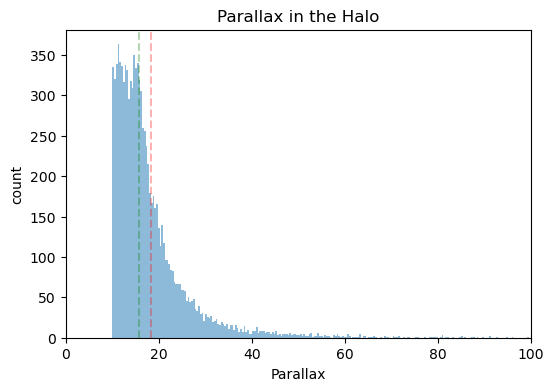

In [7]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thin_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
plt.xlim(0, 100)
plt.title('Parallax in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thick_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
plt.xlim(0, 100)
plt.title('Parallax in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(halo['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
plt.xlim(0, 100)
plt.title('Parallax in the Halo')

### Proper Motion RA vs Dec for thin disk, thick disk, and galactic halo

#### Thin and thick disk white dwarfs have a more even spread around the origin (low proper motion)
$\quad$ -Thin disk ~ 500

$\quad$ -Thick disk ~ 1000

$\quad$ -Halo ~ 2000 - 5000
#### Galactic halo white dwarfs have broader spread

Text(0.5, 1.0, 'Proper motion RA vs Dec in the galactic halo')

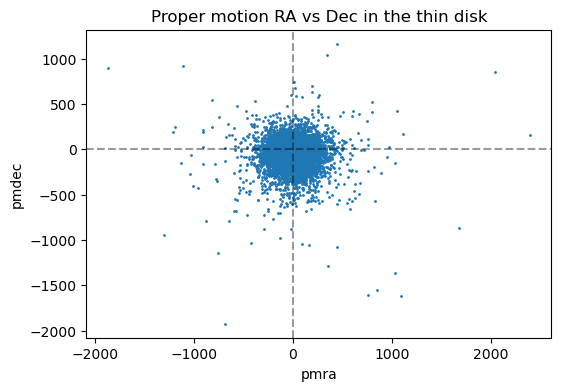

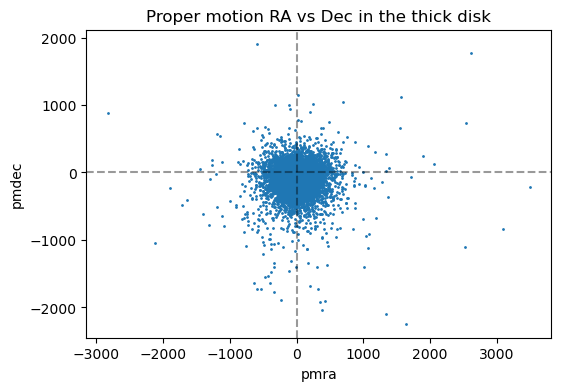

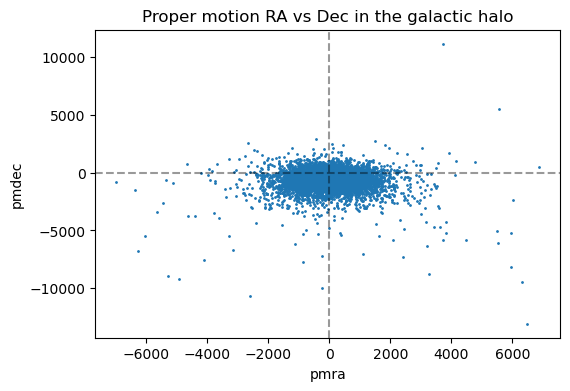

In [8]:
plt.subplots(figsize=(6, 4))
plt.scatter(thin_disk['pmra'], thin_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thin disk')

plt.subplots(figsize=(6, 4))
plt.scatter(thick_disk['pmra'], thick_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thick disk')

plt.subplots(figsize=(6, 4))
plt.scatter(halo['pmra'], halo['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the galactic halo')

### In order to take out any bias due to the ordering of the data, shuffle the training set

In [9]:
# Shuffle Rows in the Dataset to get rid of any bias that could've been present due to ordering
randomized_training_set = training_set.iloc[np.random.permutation(len(training_set))].reset_index(drop=True)


### Sort the data set into features, and target array (location of white dwarfs)

In [10]:
# Create an dataframe of the features of the White Dwarfs
features = randomized_training_set.drop(['label'], axis=1)

# Create an array of the galactic locations of the White Dwarfs
target_array = randomized_training_set['label']


### Normalize the features by using Min - Max Scaling

$\quad$ -range of values for all features now between -1 and 1

### Min-Max Scaling (between [-1, 1]):

### $\qquad x_{scaled} = 2 * \frac{x - x_{min}}{x_{max}-x_{min}} - 1$

Scaled Dataset Using Pandas


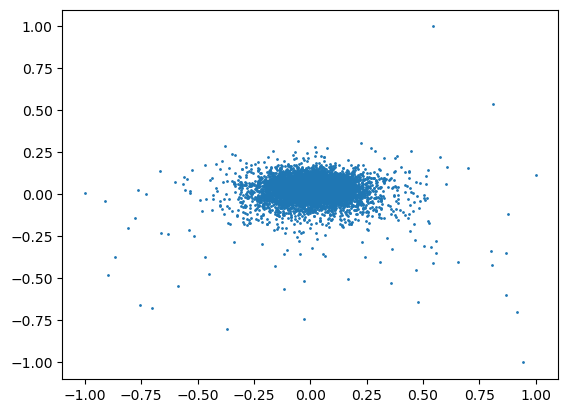

In [66]:
# Normalization using min-max scaling
features_norm = AC.min_maxing(features, range=-1)


print("Scaled Dataset Using Pandas")
features_norm.head()


plt.scatter(features_norm['pmra'], features_norm['pmdec'], s=1)

### Splitting Features Dataframe and Target Array into train and validation dataframes and arrays


#### 75% chosen for split

This number is chosen for a couple reasons:

1) The more training data we have the better our decision trees known patterns that exist in our dataset

2) A substantial amount of validation data is still important as this lets us verify our decision trees

3) Another point to note is that the decision tree is computationally expensive so having 75% of training data vs 90% reduces the time taken to fit our decision trees

In [12]:
# Select ratio
ratio = 0.75

total_rows_features_norm = features_norm.shape[0]
total_rows_features = features.shape[0]
train_size = int(total_rows_features*ratio)
train_size_norm = int(total_rows_features_norm*ratio)

# Split Feature data into train and validate
features_train_norm = features_norm[0:train_size_norm]
features_train = features[0:train_size]
features_validate_norm = features_norm[train_size_norm:]
features_validate = features[train_size:]


total_rows_target = target_array.shape[0]
target_size = int(total_rows_target*ratio)

# Split Target data into train and validate
target_train = target_array[0:train_size]
target_validate = target_array[train_size:]

In [13]:
# print feature train set
print("Features Train dataframe")
print(len(features_train))

# print feature validate set
print("Features Validation dataframe")
print(len(features_validate))

# print target train set
print("Target Train dataframe")
print(len(target_train))

# print target validate set
print("Target Validation dataframe")
print(len(target_validate))

Features Train dataframe
22500
Features Validation dataframe
7500
Target Train dataframe
22500
Target Validation dataframe
7500


In [14]:
print(target_train)
print(features_train)

0        0
1        1
2        1
3        1
4        2
        ..
22495    2
22496    1
22497    2
22498    1
22499    1
Name: label, Length: 22500, dtype: int64
       Unnamed: 0     ra    dec     plx   pmra   pmdec   g_mag  bp_mag  \
0           15121  2.153 -0.767  18.271   64.8   -71.6  17.867  18.174   
1           44480  3.945 -0.261  35.566  -74.4  -436.7  17.660  18.287   
2           37529  2.819 -1.281  17.299 -428.2    59.0  19.507  19.985   
3           57790  2.831 -0.129  25.335 -129.8  -435.9  18.327  18.700   
4           97484  5.655 -0.154  30.166  958.9 -1325.7  18.485  19.100   
...           ...    ...    ...     ...    ...     ...     ...     ...   
22495       82561  6.225  0.505  10.574  309.9  -329.1  17.834  17.980   
22496       38443  0.203  0.647  12.840  209.0   175.5  16.473  16.515   
22497       94703  3.546  0.324  17.625 -748.8  -106.2  19.664  20.322   
22498       37530  1.568 -0.928  11.366   22.9    44.8  17.439  17.537   
22499       55440  0.903

In [15]:
# There exists 11 features

# Decision Tree Classifier (6.4)


### Creating the Decision Tree Class (6.4.1)

In [70]:
class DecisionTreeModel:
    feature_column = ['ra','dec','plx','pmra','pmdec','g_mag','bp_mag','rp_mag', 'g_rp', 'bp_g', 'bp_rp']
    '''
     encapsulate all the methods and properties of my decision tree algorithm
    '''
    def __init__(self, max_depth, max_features, feature_index, threshold, tree=None, dataset=None, labels=None, depth=0):
        
        '''
        DESCRIPTION: Initializes the decision tree class
        
        self: The instance on which a method is called
        
        max_depth: controls the maximum depth of the tree
        
        max_features:  
        - determines the number of features to consider at each split within the tree. 
        - If max features is set to None, the model will consider all features, as in a standard decision tree
        
        feature_index: The index of the feature to split on 
        
        threshold: The threshold value for the split
        
        dataset: The dataset
        
        labels: The class labels for each sample in dataset
        
        tree: stores the root of the decision tree structure once it is built, initially set to None
        ''' 
        
        self.max_depth = max_depth
        self.max_features = max_features
        self.feature_index = feature_index
        self.threshold = threshold
        self.tree = tree
        self.dataset = dataset
        self.labels = labels
        self.depth = depth
        self.feature_column = DecisionTreeModel.feature_column
        
    
    def __repr__(self):
        
        '''
        dunder repr function for providing a dev friendly string of attributes
        '''
        
        return "DecisionTreeModel({} {} {} {} {} {} {} {})".format(self.max_depth, self.max_features, self.feature_index, self.threshold, self.tree, self.dataset, self.labels, self.depth)
        
    def __str__(self):
         
        '''
        dunder str function for providing a user friendly string of attributes
        '''
        
        return "max depth = {}, max features = {}, feature index = {}, threshold = {}, tree = {}, dataset = {}, labels = {}, depth = {}".format(self.max_depth, self.max_features, self.feature_index, self.threshold, self.tree, self.dataset, self.labels, self.depth)
    
    
    
    def gini(self, labels):
        
        '''
        DESCRIPTION: calculate the Gini impurity of a set of labels y using the formula:
        
        1 - \Sum_{i=1}^k p_i^2
        
        where p_i is the probability of a randomly chosen element being classified as class i
        
        scores range from 0 (pure node) to 0.5 (maximum impurity in binary classification)
        
        INPUTS: labels
        
        OUTPUT: The method returns a single float representing the impurity
        '''
        # Deals with divide by zero error
        if len(labels) == 0:
            return 1 
        
        # Splits the labels into their respective parts
        n0 = labels[labels==0] 
        n1 = labels[labels==1]
        n2 =  labels[labels==2]
        
        # Divides the amount of labels for a specific class by the total number of labels
        p_0 = float(len(n0) / len(labels))
        p_1 = float(len(n1) / len(labels))
        p_2 = float(len(n2) / len(labels))
            
        # sums up the square of the probabilities
        p_sum = p_0**2 + p_1**2 + p_2**2  

        # calculates the gini impurity
        gini = 1 - p_sum
        return gini
        
        
    
    def split(self):
    
        '''
        DESCRIPTION: divides the dataset into two subsets based on a given feature and threshold
        
        INPUTS: 
            X: Dataset to split
            y: The class labels for each sample in X
            feature_index: The index of the feature to split on
            threshold: The threshold value for the split
            
        OUTPUTS: 
             X left and X right: Data subsets containing the left and right splits of X
             y left and y right: Class labels corresponding to the left and right subsets
        '''
    
        # Defines the column from the dataset for a specific feature (i.e. feature_index = 'plx')
        feature = self.dataset[self.feature_column[self.feature_index]]  
        
        # Gives the split for each element in the column of feature
        left_split = feature <= self.threshold
        right_split = feature > self.threshold

        # Assigns the elements of the dataset/labels that pass the specified split to new arrays
        X_left = self.dataset[left_split].reset_index(drop=True)
        X_right = self.dataset[right_split].reset_index(drop=True)
        y_left = self.labels[left_split].reset_index(drop=True)
        y_right = self.labels[right_split].reset_index(drop=True)
        return X_left, X_right, y_left, y_right
        
    
    def best_split(self):
        
        '''
        DESCRIPTION: Given a dataset X and its labels y, this method evaluates all possible feature and threshold combinations to find the split that minimizes the Gini impurity
        
        INPUTS: 
            X: The dataset to evaluate for the best split.
            y: The class labels for each sample in X
            
        OUTPUTS: The method returns a dictionary representing the best split found
            feature index: The index of the feature used for the best split.
            threshold: The threshold value for the best split.
            X left and X right: Data subsets containing the left and right splits of X.
            y left and y right: Class labels for the left and right subsets of y
        '''
        
        # Creates an array of feature indexes
        if self.max_features is None or self.max_features > len(self.feature_column):
            feature_indexed = np.arange(len(self.feature_column))
        else:
            feature_indexed = np.random.choice(len(self.feature_column), size=self.max_features,replace=False)
    
        # Initializes our starting best gini value and dictionary so we can store those values throughout the loop
        best_gini = 1.0       
        d = None 
    
        # Loops through each feature index
        for jj in range(len(feature_indexed)):
            
            # Sets our feature index to be our array of features, then pulls out a column for that feature
            self.feature_index = feature_indexed[jj]
            feature = self.dataset[self.feature_column[self.feature_index]]
                
            # Selects only unique values in our feature array to be used as candidate thresholds
            unique_features = list(dict.fromkeys(feature))
            candidate_threshold = unique_features
            
            # Loops through each candidate threshold
            for ii in range(len(candidate_threshold)):
                # Sets our threshold as the array of candidate thresholds
                self.threshold = candidate_threshold[ii]

                # Splits our data set for candidate_threshold[ii]
                x_left, x_right, y_left, y_right = self.split()
                
                # Calculates the Gini impurity for the left and right data
                Gini_left = self.gini(y_left)
                Gini_right = self.gini(y_right)
                
                # Calculates the weighted impurity for the decision
                I_split = (len(y_left) / len(self.labels)) * Gini_left +  (len(y_right) / len(self.labels)) * Gini_right
                
                # If the weighted impurity is less than the best gini value, update both the best gini value and store the data in a dictionary
                if I_split < best_gini:         
                    best_gini = I_split          
                    best_split = {}
                    best_split['feature_index'] = feature_indexed[jj]
                    best_split['threshold'] = candidate_threshold[ii]
                    best_split['x_left'] = x_left
                    best_split['x_right'] = x_right
                    best_split['y_left'] = y_left
                    best_split['y_right'] = y_right
                    best_split['I_split'] = I_split
            
        # Returns our best split values 
        return best_split
    
    def build_tree(self, X=None, y=None, depth=0):
        
        '''
        DESCRIPTION: constructs the entire decision tree by finding the best split at each node using the best_split() and split_methods(), while evaluating the node purity with gini()
        
        INPUTS: 
            X: The current subset of the dataset.
            y: The class labels for the current subset.
            depth: The current depth level in the tree (initialize this as 0)
    
        OUTPUTS: returns a dictionary representing the node with the following attributes
            feature index and threshold if its a decision node.
            gini (the impurity score) and samples (the count of samples).
            left and right, which are the left and right child nodes if its a decision node.
            value if its a leaf node (the predicted class label).
        '''
        # Sets X, and y to the dataset and labels
        if X is None and y is None:
            X = self.dataset
            y = self.labels

        
        self.dataset = X
        self.labels = y

        # Minimum number of samples allowed
        minimum_samples = 5

        # First leaf node condition: If the depth is at or exceeds the max depth, return parameters of the leaf node
        if depth >= self.max_depth:
            # Finds the most common label from the avaliable labels
            most_common_class = max(set(y), key=list(y).count)
            
            leaf_node = {}
            leaf_node['type'] = "leaf"
            leaf_node['value'] = most_common_class
            leaf_node['gini'] = self.gini(y)
            leaf_node['samples'] = len(y)
            leaf_node['stopping_condition'] = "max depth achieved"
            return leaf_node

        # 2) Too few samples
        elif len(y) <= minimum_samples:
            # Second leaf node condition: If the the number of samples is equal to or smaller than the minimum amount of samples, return parameters of the leaf node
            most_common_class = max(set(y), key=list(y).count)
            
            leaf_node = {}
            leaf_node['type'] = "leaf"
            leaf_node['value'] = most_common_class
            leaf_node['gini'] = self.gini(y)
            leaf_node['samples'] = len(y)
            leaf_node['stopping_condition'] = "minimum samples reached"
            return leaf_node

        # Third leaf node condition: If all labels are the same label, return parameters of the leaf noe
        elif len(np.unique(y)) == 1:
            leaf_node = {}
            leaf_node['type'] = "leaf"
            leaf_node['value'] = y[0]
            leaf_node['gini'] = 0.0
            leaf_node['samples'] = len(y)
            leaf_node['stopping_condition'] = "all remaining labels are the same"
            return leaf_node

        # Condition for when we're at a decision node
        else:
            # splits data using best split method
            best_split = self.best_split()

            # Runs build tree method recursiely using the left part, updating the depth by 1
            left_child = self.build_tree(best_split['x_left'], best_split['y_left'], depth + 1)
            
            # Runs build tree method recursiely using the left part, updating the depth by 1
            right_child = self.build_tree(best_split['x_right'], best_split['y_right'], depth + 1)

            decision_node = {}
            decision_node['type'] = "decision"
            decision_node['feature_index'] = best_split['feature_index']
            decision_node['threshold'] = best_split['threshold']
            decision_node['samples'] = len(best_split['y_left']) + len(best_split['y_right'])
            decision_node['left'] = left_child
            decision_node['right'] = right_child
            decision_node['I_split'] = best_split['I_split']
            return decision_node    
            
            
    
    def fit(self, X=None, y=None):
        
        '''
        DESCRIPTION: initiates the tree-building process by calling build tree on the input data
        
        INPUTS:
            X: The dataset used to train the tree.
            y: The class labels for each sample in X
        
        OUTPUTS: The method does not return anything, but it updates the tree attribute with the structure of the trained decision tree
        '''
        if X is None and y is None:
            X = self.dataset
            y = self.labels

        
        self.dataset = X
        self.labels = y

        # Build the tree (this will mutate self.dataset / self.labels during recursion)
        self.tree = self.build_tree(self.dataset, self.labels, depth=0)

        self.dataset = X
        self.labels = y
        
        return self
    
    def predict_sample(self, sample, node=None):
        
        '''
        DESCRIPTION: predict the class for a single sample through the trained decision tree
        
        INPUTS:
            sample: A single data sample for which we want to predict the class label.
            node: The current node in the decision tree (start with the root node)
        
        OUTPUTS: returns the predicted class label for the input sample
        '''
        # Sets the node to the root node
        if node == None:
            node = self.tree
        
        # If were at leaf node, return the label value
        if node['type'] == 'leaf':
            return node['value']
        
      
        
        # value of the sample from the dataest based off the node were at
        value = sample[self.feature_column[node['feature_index']]]
        # threshold from the node were at
        threshold = node['threshold']
    
        # if that value is below the threshold run predict sample using the left data set
        if value <= threshold:
            return self.predict_sample(sample, node=node['left'])
        # if that value is above the threshold run predict sample using the right data set
        else:
            return self.predict_sample(sample, node=node['right'])
            
        
    def predict(self, X):
        
        '''
        DESCRIPTION: predict class labels for all samples in X by calling predict sample for each sample
        
        INPUTS:
            X: The dataset for which to predict class labels
        
        OUTPUTS: Return a list of predicted class labels, one for each sample in X
        '''
        
        if X is None:
            X = self.dataset
            
        self.dataset = X
        # Creates an empty array to store predictions
        predictions = []
        
        # Loops through the provided dataset
        for ii in range(len(self.dataset)):
            # sets the sample as each line of the dataset
            sample = self.dataset.iloc[ii]
            # calls predict_sample on the samples appending the values to the array
            prediction = self.predict_sample(sample)
            predictions.append(int(prediction))
        
        return predictions
            
        
    
    def plot_tree(self):
        
        '''
        DESCRIPTION: initializes the plotting environment and starts the recursive plotting from the root node
        
        INPUTS:
            feature names (optional): A list of feature names. If provided, the feature names will be used in the node labels instead of generic names (e.g., X0, X1)
            
        OUTPUTS: displays the plot showing the structure of the decision tree
        '''
        
        pass
    
    def plot_node(self):
        
        '''
        DESCRIPTION: responsible for plotting a single node and recursively calling itself to plot child nodes
        
        INPUTS:
            node: The current node to plot. This can be either a decision node or a leaf node.
            pos: The position of the node in the plot (as coordinates).
            parent pos: The position of the parent node. Used to draw lines connecting the parent node to the current node.
            depth: The current depth of the node in the tree. Used for calculating positions and layout.
            ax: The matplotlib axes object where nodes and lines are drawn.
            feature names (optional): A list of feature names to use in node labels if available
            x offset and y offset: Offset values to control the horizontal and vertical spacing between nodes.
            font size: Font size for text in the plot
        
        OUTPUTS: modifies the plot to display the node and any connecting lines
        '''
        
        pass

<>:64: SyntaxWarning: invalid escape sequence '\S'
<>:64: SyntaxWarning: invalid escape sequence '\S'
C:\Users\casey\AppData\Local\Temp\ipykernel_22840\1008483363.py:64: SyntaxWarning: invalid escape sequence '\S'
  1 - \Sum_{i=1}^k p_i^2


### Display info about the Decision Tree Class using help(Class)

In [71]:
print(help(DecisionTreeModel))

Help on class DecisionTreeModel in module __main__:

class DecisionTreeModel(builtins.object)
 |  DecisionTreeModel(
 |      max_depth,
 |      max_features,
 |      feature_index,
 |      threshold,
 |      tree=None,
 |      dataset=None,
 |      labels=None,
 |      depth=0
 |  )
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      max_depth,
 |      max_features,
 |      feature_index,
 |      threshold,
 |      tree=None,
 |      dataset=None,
 |      labels=None,
 |      depth=0
 |  )
 |      DESCRIPTION: Initializes the decision tree class
 |
 |      self: The instance on which a method is called
 |
 |      max_depth: controls the maximum depth of the tree
 |
 |      max_features:
 |      - determines the number of features to consider at each split within the tree.
 |      - If max features is set to None, the model will consider all features, as in a standard decision tree
 |
 |      feature_index: The index of the feature to split on
 |
 |      threshold: The t

### Using the Decision Tree Class (COMMENTED OUT TO SAVE COMPUTE TIME ON ACTUAL TASKS: ONLY HERE TO SHOW HOW TO USE THE CLASS)


### Create an instance of the tree

In [ ]:
# test = DecisionTreeModel(max_depth=5, max_features=11, feature_index=0, threshold=0, tree=None, dataset=features_train, labels=target_train)

### Calculate the gini impurity

### Split the data (sanity check: length of left and right combined should equal length of data)

In [67]:
# gini_score = test.gini(target_train)
# print(gini_score)

# split_x_l, split_x_r, split_y_l, split_y_r = test.split()
# print(len(split_x_l))
# print(len(split_x_r))
# print(len(split_y_l))
# print(len(split_y_r))





### Run best split on the data (warning takes some time to run)


#### Print out characteristics of the best split

In [68]:
# best_split_test = test.best_split() 

In [69]:
# print('The feature index used: ' + str(best_split_test['feature_index']))
# print('The threshold selected for the split: ' + str(best_split_test['threshold']))
# print('Length of X left: ' + str(len(best_split_test['x_left'])))
# print('Length of X right: ' + str(len(best_split_test['x_right'])))
# print('Length of y left: ' + str(len(best_split_test['y_left']))) 
# print('Length of y right: ' + str(len(best_split_test['y_right'])))
# print('Best Gini impurity found: ' + str(best_split_test['I_split']))

### Build Tree from the instance (warning takes a lot of time to run)


#### Print out characteristics of the best split

In [22]:
# build_tree_test = test.build_tree()

In [23]:
# decision = build_tree_test['type']
# print(str(decision) + ' node')
# if decision == "decision":
#     print('The feature index used for this node: ' + str(build_tree_test['feature_index']))
#     print('The threshold selected for this node: ' + str(build_tree_test['threshold']))
#     print('Amount of samples in this node: ' + str(build_tree_test['samples'])) 
#     print('Information about node type and characteristics for the left data: ' + str(build_tree_test['left'])) 
#     print('Information about node type and characteristics for the right data: ' + str(build_tree_test['right'])) 
#     print('Best Gini impurity found for this node: ' + str(build_tree_test['I_split']))
# else:
#     print('Predicted class value: ' + str(build_tree_test['value']))
#     print('Gini score at leaf node: ' + str(build_tree_test['gini']))
#     print('Amount of samples in this node: ' + str(build_tree_test['samples']))
#     print('Stopping condition of the leaf node: ' + str(build_tree_test['stopping_condition']))

### Initialize the tree building process

In [24]:
# fitted_test = test.fit(features_train, target_train)

### Predict the class value based on one sample of features

In [25]:
# test_sample = features_train.iloc[0]
# single_prediction_test = fitted_test.predict_sample(test_sample)
# print(single_prediction_test)

### Predict the class of all features in the training data

In [26]:
# predicted = fitted_test.predict()
# print(predicted)

# Model Training and Validation (6.4.2)


### Initialize a decision with select parameters

In [27]:
decision_1 = DecisionTreeModel(max_depth=5, max_features=5, feature_index=0, threshold=0, tree=None, dataset=features, labels=target_array)

### Initialize the fit on the training data and using predict() to predict the classes of the data samples in the validation data

In [29]:
fit_1 = decision_1.fit(features_train, target_train)

In [30]:
predicted = fit_1.predict(features_validate)
print(predicted)

[2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 

### Create a function (See Functions.py) that calculates the accuracy of the preciction

#### Shows us how accurate our predictions were

In [31]:
A = AC.Accuracy(target_validate, predicted)
print('Our predictions were ' + str(A*100) + '% accruate')

Our predictions were 72.88% accruate


### Create a function (See Functions.py) that calculates the confusion matrix of our predictions

#### Tells us how well our classification model is working by comparing predictions to the actual values for all combinations (i.e. predicted 1, but actual was 0)

In [32]:
CM = AC.Confusion(target_validate, predicted)
print('Confusion matrix:')
print(str(CM[0]))
print(str(CM[1]))
print(str(CM[2]))

Confusion matrix:
[2004, 503, 26]
[751, 1585, 180]
[214, 360, 1877]


### Create a function (See Functions.py) that calculates the F1 score of our predictions

#### Combines precision and recall into one statistic. A better metric for how well our model is performing

In [33]:
F1_score_0 = AC.F1(CM, 0)
F1_score_1 = AC.F1(CM, 1)
F1_score_2 = AC.F1(CM, 2)

In [34]:
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2))

Our F1 score for thin disk WDs is: 0.7284623773173392
Our F1 score for thick disk WDs is: 0.6385979049153909
Our F1 score for galactic halo WDs is: 0.827966475518306


### Discussing how adjusting parameters in our Decision Tree affects the outcomes

# Applying trained model to test data (6.4.3)

### Loading in test data (remove gaia_id so it works with our class)

In [35]:
test_data =  pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_and_Data_Analysis\\Databases\\test.csv").drop(['gaia_id'], axis=1)
print(test_data)

       Unnamed: 0          ra        dec        plx         pmra        pmdec  \
0               0  114.832441  20.141537  15.529497   -21.721836     8.741964   
1               1  241.033495 -22.233835  13.047731    21.426339     4.049864   
2               2   51.096542 -19.416015  24.456277   -38.719914   -14.520563   
3               3   96.968286 -46.016491  12.049674   -16.513120     9.110425   
4               4  233.277945  57.542294  16.512933    27.995747   -24.600976   
...           ...         ...        ...        ...          ...          ...   
13727       13727  125.580571 -12.823334  16.199233   865.007074  -881.398871   
13728       13728  170.973150  57.708166  10.468369   -30.094283  -491.289273   
13729       13729  310.649029 -52.305570  11.781754   399.802019  -828.768600   
13730       13730   27.037668 -17.208765  12.954320  -105.966890 -1105.825359   
13731       13731  161.489061  59.074624  17.482111 -1019.194654 -1462.529939   

           g_mag     bp_mag

### Precict results of our test data using our trained decision tree

In [ ]:
predict_test_data = fit_1.predict(test_data)
print(predict_test_data)


[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 

### Add these predicted labels to our dataframe for ease of analysis

In [39]:
test_data['pred_labels'] = predict_test_data
print(test_data)

       Unnamed: 0          ra        dec        plx         pmra        pmdec  \
0               0  114.832441  20.141537  15.529497   -21.721836     8.741964   
1               1  241.033495 -22.233835  13.047731    21.426339     4.049864   
2               2   51.096542 -19.416015  24.456277   -38.719914   -14.520563   
3               3   96.968286 -46.016491  12.049674   -16.513120     9.110425   
4               4  233.277945  57.542294  16.512933    27.995747   -24.600976   
...           ...         ...        ...        ...          ...          ...   
13727       13727  125.580571 -12.823334  16.199233   865.007074  -881.398871   
13728       13728  170.973150  57.708166  10.468369   -30.094283  -491.289273   
13729       13729  310.649029 -52.305570  11.781754   399.802019  -828.768600   
13730       13730   27.037668 -17.208765  12.954320  -105.966890 -1105.825359   
13731       13731  161.489061  59.074624  17.482111 -1019.194654 -1462.529939   

           g_mag     bp_mag

### In a similar manner to 6.2, split the data into thin disk, thick disk, and galactic halo using our predicted labels

In [40]:
# Select only data from the training set that is in the thin disk (label=0)
thin_disk = test_data[test_data["pred_labels"] == 0]

# Select only data from the training set that is in the thick disk (label=1)
thick_disk = test_data[test_data["pred_labels"] == 1]

# Select only data from the training set that is in the halo (label=2)
halo = test_data[test_data["pred_labels"] == 2]

print('the amount of white dwarfs in the training set are ' + str(len(test_data)))
print('the amount of white dwarfs in the thin disk are ' + str(len(thin_disk)))
print('the amount of white dwarfs in the thick disk are ' + str(len(thick_disk)))
print('the amount of white dwarfs in the halo are ' + str(len(halo)))

the amount of white dwarfs in the training set are 13732
the amount of white dwarfs in the thin disk are 9639
the amount of white dwarfs in the thick disk are 3868
the amount of white dwarfs in the halo are 225


### Display plots for the thin disk, thick disk, and galactic halo to make comments on what we see

Text(0.5, 1.0, 'G Magnitude Distributions in the Halo')

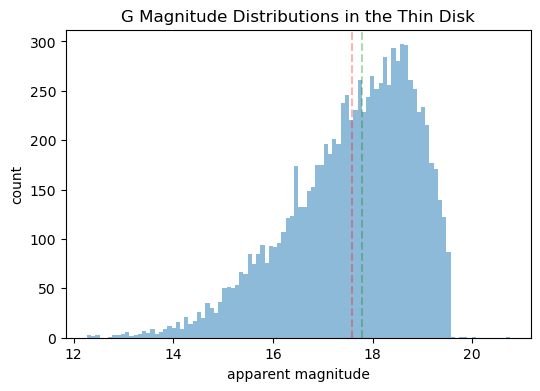

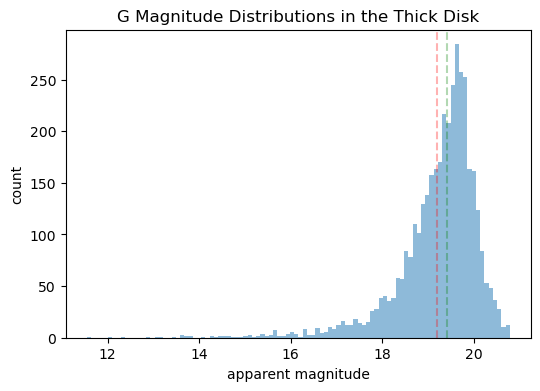

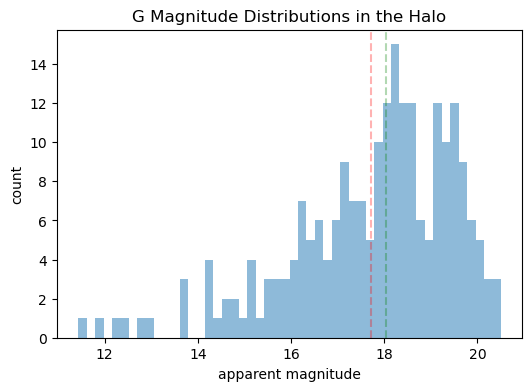

In [41]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['g_mag'], bins=50, alpha=.5)
plt.axvline(np.mean(halo['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Halo')

Text(0.5, 1.0, 'BP - RP color index in the Halo')

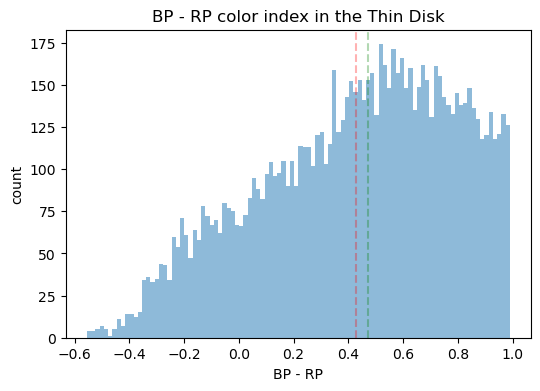

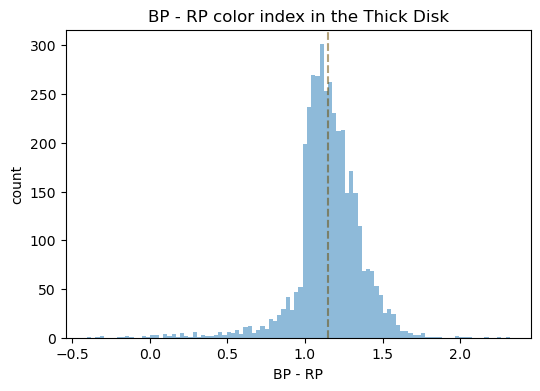

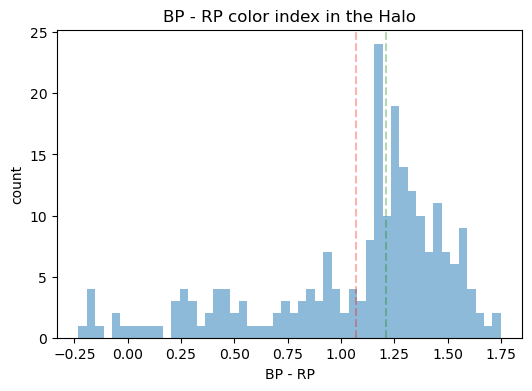

In [59]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['bp_rp'], bins=50, alpha=.5)
plt.axvline(np.mean(halo['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Halo')

Text(0.5, 1.0, 'Parallax in the Halo')

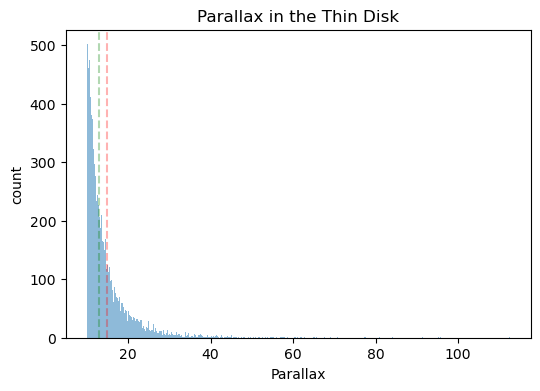

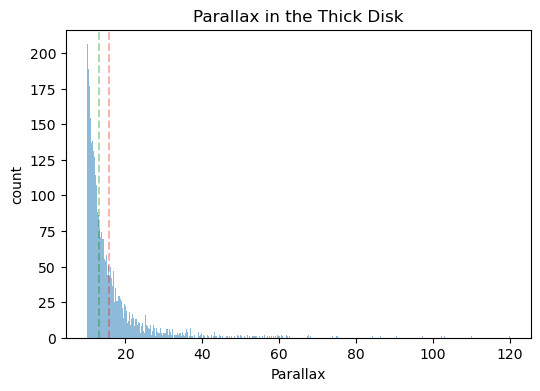

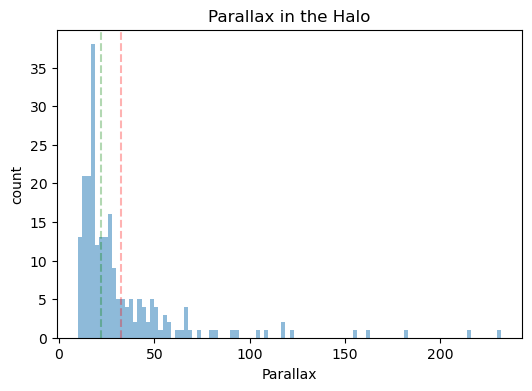

In [43]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thin_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thick_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['plx'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Halo')

Text(0.5, 1.0, 'Proper motion RA vs Dec in the galactic halo')

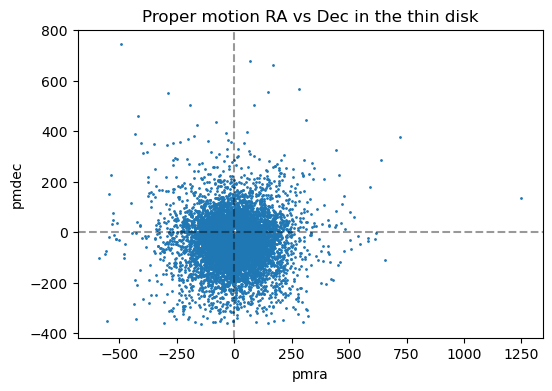

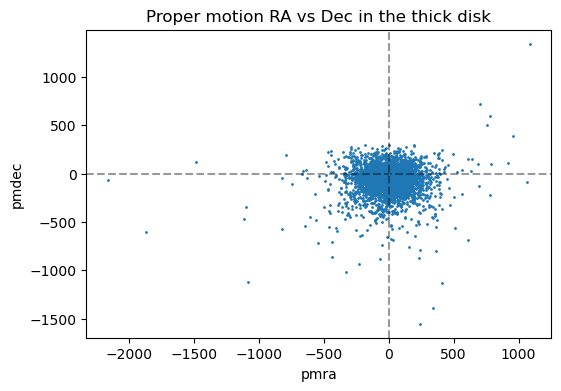

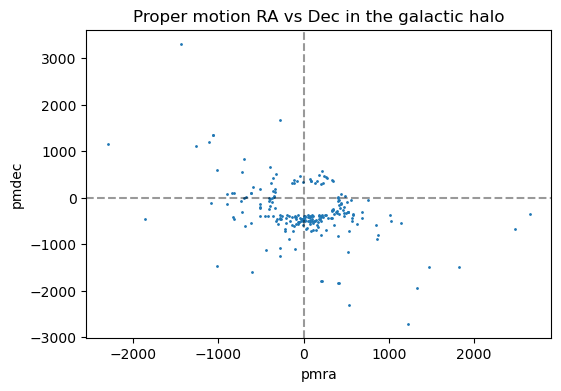

In [44]:
plt.subplots(figsize=(6, 4))
plt.scatter(thin_disk['pmra'], thin_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thin disk')

plt.subplots(figsize=(6, 4))
plt.scatter(thick_disk['pmra'], thick_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thick disk')

plt.subplots(figsize=(6, 4))
plt.scatter(halo['pmra'], halo['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the galactic halo')

### Discuss what we observe

# Random Forest (6.5)

### Code Implementation (6.5.1)

In [80]:
class RandomForest:
    ''' 
    encapsulate all the methods and properties of my decision tree algorithm 
    '''
    def __init__(self, n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf, trees=None, dataset=None, labels=None):
        
        '''
        DESCRIPTION: Initializes the random forest class
        
        self: The instance on which a method is called
        
        n_estimators: control the number of decision trees to include in the forest
        
        max_depth: controls the maximum depth of the tree
        
        max_features:  
        - determines the number of features to consider at each split within the tree. 
        - If max features is set to None, the model will consider all features, as in a standard decision tree
        
        min_samples_split: control the minimum number of samples required to split a node
        
        min_samples_leaf: control the minimum number of samples required to be in a leaf node
       
        trees:  initialize an empty list to store eachtrained decision tree
        '''
        
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_split = min_samples_split # Optional
        self.min_samples_leaf = min_samples_leaf # Optional
        self.trees = []
        self.dataset = dataset
        self.labels = labels
        
        
    def __repr__(self):
        
        '''
        dunder repr function for providing a dev friendly string of attributes
        '''
        
        return "DecisionTreeModel({} {} {} {} {} {} {} {})".format(self.n_estimators, self.max_depth, self.max_features, self.min_samples_split, self.min_samples_leaf, self.trees, self.dataset, self.labels)
        
    def __str__(self):
         
        '''
        dunder str function for providing a user friendly string of attributes
        '''
        
        return "n estimators = {}, max depth = {}, max features = {}, feature min_samples_split = {}, min_samples_leaf = {}, trees = {}, dataset = {}, labels = {}".format(self.n_estimators, self.max_depth, self.max_features, self.min_samples_split, self.min_samples_leaf, self.trees, len(self.dataset), len(self.labels))
    
    
    def bootstrap(self, X=None, y=None):
        
        ''' 
        DESCRIPTION: Each tree in the forest will be trained on a randomly selected subset of the data
        
        INPUT: 
        - The feature matrix X 
        - The target vector y
        
        OUTPUT: 
        - A tuple containing the bootstrap sample of X and y
        '''
        if X is None and y is None:
            X = self.dataset
            y = self.labels
        
    
        ii = np.random.choice(len(X), size=len(X), replace=True)
        
        bootstrapped_X = X.iloc[ii].reset_index(drop=True)
        bootstrapped_y = y.iloc[ii].reset_index(drop=True)
        
        bootstrap_tuple = (bootstrapped_X, bootstrapped_y)
        
        return bootstrap_tuple
        
    
    
    def fit(self, X=None, y=None):
        
        ''' 
        DESCRIPTION: Will train the Random Forest by creating and fitting multiple Decision Tree models on bootstrap samples
        
        INPUT: 
        - X train: The training data
        - y train: The labels.
        
        OUTPUT: Does not return anything, but updates the trees attribute with all trained decision trees.

        '''
        if X is None and y is None:
            X = self.dataset
            y = self.labels
        
        for ii in range(self.n_estimators):
            bootstrapped = self.bootstrap(X, y)
            decision = DecisionTreeModel(self.max_depth, self.max_features, feature_index=1, threshold=1,tree=None,dataset=None,labels=None,depth=0)
            fitted = decision.fit(bootstrapped[0], bootstrapped[1])
            self.trees.append(fitted)
            
        return self
            
            
    def predict(self, X):
        
        ''' 
        DESCRIPTION: Will take input data andaggregate predictions from all trees in the forest to make a final prediction
        
        INPUT: The feature matrix X for which predictions are needed
        
        OUTPUT: A list of final predicted class labels for each sample in X
        '''
        if X is None:
            X = self.dataset
        
        predictions = []
        for ii in range(len(self.trees)):
            prediction = self.trees[ii].predict(X)
            predictions.append(prediction)


        predictions = np.array(predictions).T
        
        
        final_predictions = []
        
        for jj in range(len(predictions)):
            counts = np.bincount(predictions[jj])
            final_label = np.argmax(counts)
            final_predictions.append(int(final_label))
        
        return final_predictions    
    
    

### Model Training and Validation (6.5.2)

#### Similarly to the decision tree tests, create an instance of the random forest, get predictions from our class, and calculate the accuracy, confusion matrix, and F1 scores

In [ ]:
rand = RandomForest(3, 4,3,4,5,dataset=features, labels=target_array)


In [47]:
fitted = rand.fit(features_train, target_train)

In [50]:
predictions = fitted.predict(features_validate)
print(predictions)

[np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0)

In [51]:
A = AC.Accuracy(target_validate, predictions)
print('Our predictions were ' + str(A*100) + '% accruate')

Our predictions were 71.98666666666666% accruate


In [52]:
CM = AC.Confusion(target_validate, predictions)
print('Confusion matrix:')
print(str(CM[0]))
print(str(CM[1]))
print(str(CM[2]))

Confusion matrix:
[1967, 488, 78]
[707, 1543, 266]
[230, 332, 1889]


In [53]:
F1_score_0 = AC.F1(CM, 0)
F1_score_1 = AC.F1(CM, 1)
F1_score_2 = AC.F1(CM, 2)

In [54]:
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2))

Our F1 score for thin disk WDs is: 0.7235607871988228
Our F1 score for thick disk WDs is: 0.6325066612010657
Our F1 score for galactic halo WDs is: 0.8065755764304013


### Vary parameters in different instances to see how A, CM, and F1 change

#### n_estimators: 64-128

#### max_depth: 3-10

#### max featuers: sqrt(n features)

In [86]:
print(help(RandomForest))

Help on class RandomForest in module __main__:

class RandomForest(builtins.object)
 |  RandomForest(
 |      n_estimators,
 |      max_depth,
 |      max_features,
 |      min_samples_split,
 |      min_samples_leaf,
 |      trees=None,
 |      dataset=None,
 |      labels=None
 |  )
 |
 |  encapsulate all the methods and properties of my decision tree algorithm
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      n_estimators,
 |      max_depth,
 |      max_features,
 |      min_samples_split,
 |      min_samples_leaf,
 |      trees=None,
 |      dataset=None,
 |      labels=None
 |  )
 |      DESCRIPTION: Initializes the random forest class
 |
 |      self: The instance on which a method is called
 |
 |      n_estimators: control the number of decision trees to include in the forest
 |
 |      max_depth: controls the maximum depth of the tree
 |
 |      max_features:
 |      - determines the number of features to consider at each split within the tree.
 |      - If ma

rand 1 has 64 trees, and a max depth of 3

rand 2 has 64 trees, and a max depth of 10

rand 3 has 128 trees, and a max depth of 3

rand 4 has 128 trees, and a max depth of 10

All instances use a max features of sqrt(number of features) which is consistent with the literature

In [87]:
rand1 = RandomForest(64, 3,round(np.sqrt(11)),4,5,dataset=features, labels=target_array)
rand2 = RandomForest(64, 10,round(np.sqrt(11)),4,5,dataset=features, labels=target_array)
rand3 = RandomForest(128, 3,round(np.sqrt(11)),4,5,dataset=features, labels=target_array)
rand4 = RandomForest(128, 10,round(np.sqrt(11)),4,5,dataset=features, labels=target_array)

In [88]:
fit1 = rand1.fit(features_train, target_train)
fit2 = rand2.fit(features_train, target_train)
fit3 = rand3.fit(features_train, target_train)
fit4 = rand4.fit(features_train, target_train)

C:\Users\casey\AppData\Local\Temp\ipykernel_22840\1008483363.py:64: SyntaxWarning: invalid escape sequence '\S'
  1 - \Sum_{i=1}^k p_i^2


KeyboardInterrupt: 

In [ ]:
predictions1 = fit1.predict(features_validate)
print(predictions1)

predictions2 = fit2.predict(features_validate)
print(predictions2)

predictions3 = fit3.predict(features_validate)
print(predictions3)

predictions4 = fit4.predict(features_validate)
print(predictions4)

In [ ]:
def ACMF1(known_labels, predicted_labels, CM, label=0): # Calculates the accuracy, confusion matrix, and F1 scores all in one
    # Compute accuracy of predictions
    accuracy = AC.accuracy(known_labels,predicted_labels)
    
    # Compute confusion matrix
    CoMa = AC.Confusion(known_labels, predicted_labels)
    
    # Compute F1 scores
    F1_score_0 = AC.F1(CoMa, 0)
    F1_score_1 = AC.F1(CoMa, 1)
    F1_score_2 = AC.F1(CoMa, 2)
    
    return accuracy, CoMa, F1_score_0, F1_score_1, F1_score_2


In [ ]:
accuracy1, CoMa1, F1_score_0_1, F1_score_1_1, F1_score_2_1 = ACMF1(target_validate, predictions1)
accuracy2, CoMa2, F1_score_0_2, F1_score_1_2, F1_score_2_2 = ACMF1(target_validate, predictions2)
accuracy3, CoMa3, F1_score_0_3, F1_score_1_3, F1_score_2_3 = ACMF1(target_validate, predictions3)
accuracy4, CoMa4, F1_score_0_4, F1_score_1_4, F1_score_2_4 = ACMF1(target_validate, predictions4)

In [ ]:
# For rand 1
print('Our predictions were ' + str(accuracy1*100) + '% accruate')
print('\n')
print('Confusion matrix:')
print(str(CoMa1[0]))
print(str(CoMa1[1]))
print(str(CoMa1[2]))
print('\n')
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_1))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_1))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_1))

In [ ]:
# For rand 2
print('Our predictions were ' + str(accuracy2*100) + '% accruate')
print('\n')
print('Confusion matrix:')
print(str(CoMa2[0]))
print(str(CoMa2[1]))
print(str(CoMa2[2]))
print('\n')
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_2))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_2))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_2))

In [ ]:
# For rand 3
print('Our predictions were ' + str(accuracy3*100) + '% accruate')
print('\n')
print('Confusion matrix:')
print(str(CoMa3[0]))
print(str(CoMa3[1]))
print(str(CoMa3[2]))
print('\n')
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_3))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_3))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_3))

In [ ]:
# For rand 4
print('Our predictions were ' + str(accuracy4*100) + '% accruate')
print('\n')
print('Confusion matrix:')
print(str(CoMa4[0]))
print(str(CoMa4[1]))
print(str(CoMa4[2]))
print('\n')
print('Our F1 score for thin disk WDs is: ' + str(F1_score_0_4))
print('Our F1 score for thick disk WDs is: ' + str(F1_score_1_4))
print('Our F1 score for galactic halo WDs is: ' + str(F1_score_2_4))

### Applying trained model to Test dataset (6.5.3)

In [ ]:
test_data =  pd.read_csv("C:\\Users\\casey\\UnigeMasters\\Astrophysics_and_Data_Analysis\\Databases\\test.csv").drop(['gaia_id'], axis=1)
print(test_data)

       Unnamed: 0          ra        dec        plx         pmra        pmdec  \
0               0  114.832441  20.141537  15.529497   -21.721836     8.741964   
1               1  241.033495 -22.233835  13.047731    21.426339     4.049864   
2               2   51.096542 -19.416015  24.456277   -38.719914   -14.520563   
3               3   96.968286 -46.016491  12.049674   -16.513120     9.110425   
4               4  233.277945  57.542294  16.512933    27.995747   -24.600976   
...           ...         ...        ...        ...          ...          ...   
13727       13727  125.580571 -12.823334  16.199233   865.007074  -881.398871   
13728       13728  170.973150  57.708166  10.468369   -30.094283  -491.289273   
13729       13729  310.649029 -52.305570  11.781754   399.802019  -828.768600   
13730       13730   27.037668 -17.208765  12.954320  -105.966890 -1105.825359   
13731       13731  161.489061  59.074624  17.482111 -1019.194654 -1462.529939   

           g_mag     bp_mag

In [55]:
predicted_test_data = fitted.predict(test_data)
print(predicted_test_data)

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0)

In [60]:
test_data['pred_labels'] = predicted_test_data
print(test_data)

       Unnamed: 0          ra        dec        plx         pmra        pmdec  \
0               0  114.832441  20.141537  15.529497   -21.721836     8.741964   
1               1  241.033495 -22.233835  13.047731    21.426339     4.049864   
2               2   51.096542 -19.416015  24.456277   -38.719914   -14.520563   
3               3   96.968286 -46.016491  12.049674   -16.513120     9.110425   
4               4  233.277945  57.542294  16.512933    27.995747   -24.600976   
...           ...         ...        ...        ...          ...          ...   
13727       13727  125.580571 -12.823334  16.199233   865.007074  -881.398871   
13728       13728  170.973150  57.708166  10.468369   -30.094283  -491.289273   
13729       13729  310.649029 -52.305570  11.781754   399.802019  -828.768600   
13730       13730   27.037668 -17.208765  12.954320  -105.966890 -1105.825359   
13731       13731  161.489061  59.074624  17.482111 -1019.194654 -1462.529939   

           g_mag     bp_mag

In [61]:
# Select only data from the training set that is in the thin disk (label=0)
thin_disk = test_data[test_data["pred_labels"] == 0]

# Select only data from the training set that is in the thick disk (label=1)
thick_disk = test_data[test_data["pred_labels"] == 1]

# Select only data from the training set that is in the halo (label=2)
halo = test_data[test_data["pred_labels"] == 2]

print('the amount of white dwarfs in the training set are ' + str(len(test_data)))
print('the amount of white dwarfs in the thin disk are ' + str(len(thin_disk)))
print('the amount of white dwarfs in the thick disk are ' + str(len(thick_disk)))
print('the amount of white dwarfs in the halo are ' + str(len(halo)))

the amount of white dwarfs in the training set are 13732
the amount of white dwarfs in the thin disk are 9569
the amount of white dwarfs in the thick disk are 3518
the amount of white dwarfs in the halo are 645


Text(0.5, 1.0, 'G Magnitude Distributions in the Halo')

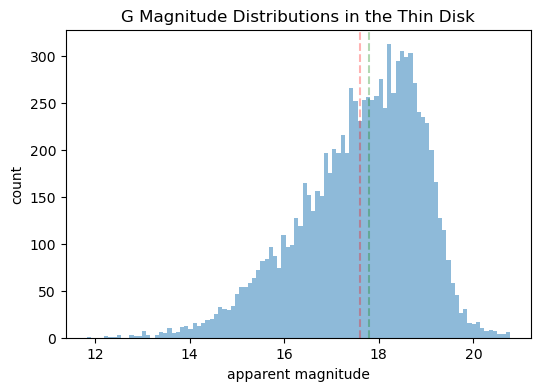

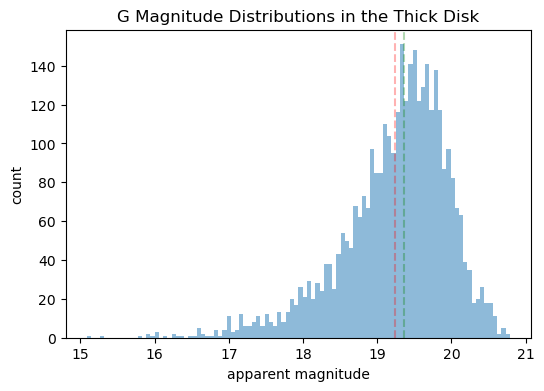

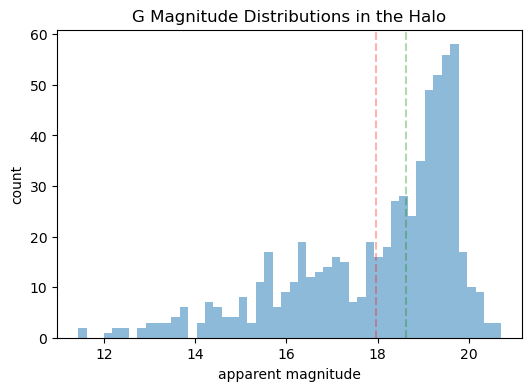

In [62]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['g_mag'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['g_mag'], bins=50, alpha=.5)
plt.axvline(np.mean(halo['g_mag']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['g_mag']), linestyle='--', color='g', alpha=.3)
plt.xlabel('apparent magnitude')
plt.ylabel('count')
plt.title('G Magnitude Distributions in the Halo')

Text(0.5, 1.0, 'BP - RP color index in the Halo')

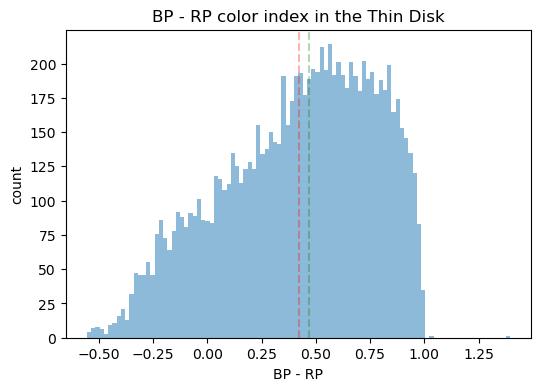

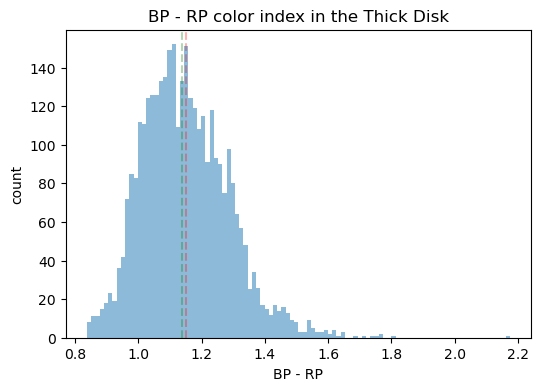

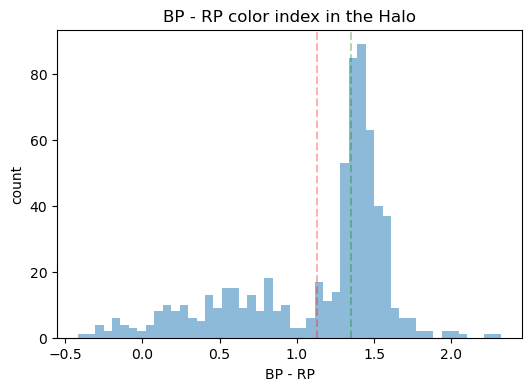

In [63]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thin_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['bp_rp'], bins=100, alpha=.5)
plt.axvline(np.mean(thick_disk['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['bp_rp'], bins=50, alpha=.5)
plt.axvline(np.mean(halo['bp_rp']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['bp_rp']), linestyle='--', color='g', alpha=.3)
plt.xlabel('BP - RP')
plt.ylabel('count')
plt.title('BP - RP color index in the Halo')

Text(0.5, 1.0, 'Parallax in the Halo')

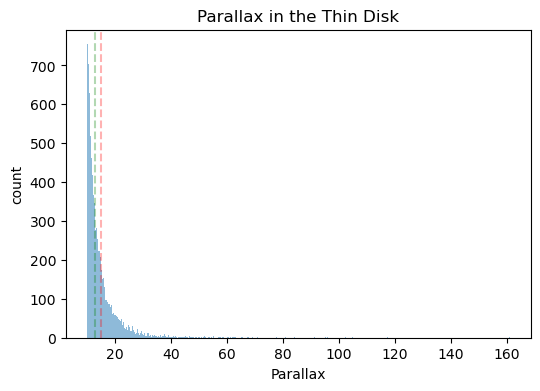

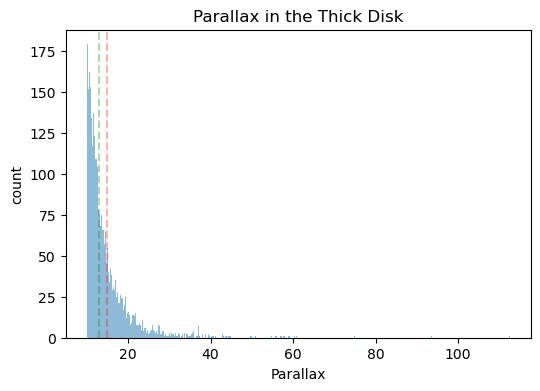

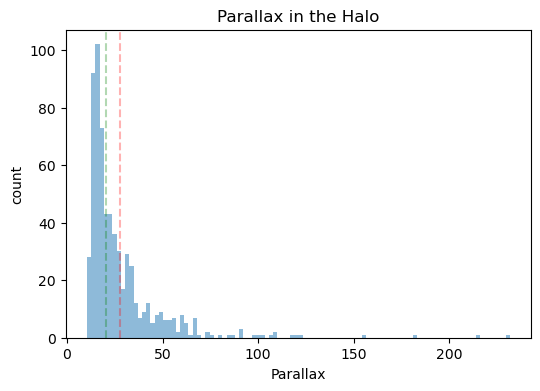

In [ ]:
plt.subplots(figsize=(6, 4))
plt.hist(thin_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thin_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thin_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Thin Disk')

plt.subplots(figsize=(6, 4))
plt.hist(thick_disk['plx'], bins=500, alpha=.5)
plt.axvline(np.mean(thick_disk['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(thick_disk['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Thick Disk')

plt.subplots(figsize=(6, 4))
plt.hist(halo['plx'], bins=100, alpha=.5)
plt.axvline(np.mean(halo['plx']), linestyle='--', color='r', alpha=.3)
plt.axvline(np.median(halo['plx']), linestyle='--', color='g', alpha=.3)
plt.xlabel('Parallax')
plt.ylabel('count')
# plt.xlim(0, 100)
plt.title('Parallax in the Halo')

Text(0.5, 1.0, 'Proper motion RA vs Dec in the galactic halo')

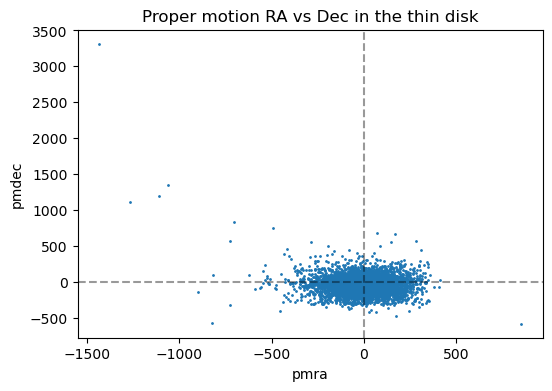

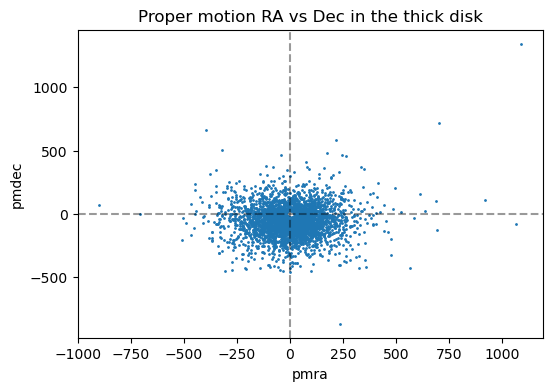

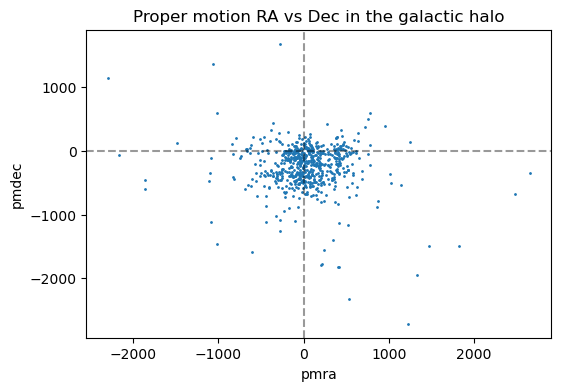

In [65]:
plt.subplots(figsize=(6, 4))
plt.scatter(thin_disk['pmra'], thin_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thin disk')

plt.subplots(figsize=(6, 4))
plt.scatter(thick_disk['pmra'], thick_disk['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the thick disk')

plt.subplots(figsize=(6, 4))
plt.scatter(halo['pmra'], halo['pmdec'], s=1)
plt.axvline(0, linestyle='--', color='black', alpha=.4)
plt.axhline(0, linestyle='--', color='black', alpha=.4)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Proper motion RA vs Dec in the galactic halo')

#### Discuss results

# Final Questions (7)

1) In working with the decision tree and Random Forest models, how did
you observe generalization affecting model performance? Describe any
strategies you implemented (or could have implemented) to improve
your model’s generalization to new data. Why do you believe these
strategies helped or would help in achieving better generalization?

2) In machine learning, achieving good generalization requires managing
the balance between bias and variance. Reflect on how this trade-off
affects a model’s ability to generalize. In your project, how did you
see bias and variance play out, and what impact did they have on your
model’s performance on unseen data

3) Generalization is often assessed through cross-validation and other testing strategies. Reflect on the validation techniques you used (or could
have used) to evaluate generalization in your project. Why are these
strategies essential, and how might they differ in their ability to reveal
a model’s generalization capabilities?
